# **Context**
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Understanding**

The UnicodeDecodeError typically occurs when the file encoding doesn't match the default encoding used by Pandas (utf-8). This issue can be resolved by specifying the correct encoding when reading the file.

*  Specify Encoding While Reading the File: Common encodings
include latin1, ISO-8859-1, or cp1252.



In [ ]:
store = pd.read_csv('/content/Sample - Superstore.csv',encoding='latin1')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
store.shape

(9994, 21)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Dates are stored as strings, we have to change them into date format.**

In [ ]:
store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Ship Date'] = pd.to_datetime(store['Ship Date'])

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



*   Max Sales is 22638.48 and Min sale is 0.44.
*   Max Quantity is 14 and Min Quantity is 1.
*   Max Profit is 8399.97 and Min Profit is -6599.97.






In [ ]:
store.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**There are no missing values in the data.**

In [ ]:
store.duplicated().sum()

0

**There are no duplicated values in the data.**

# **Exploratory Data Analysis**

1. Sales Analysis:

Total sales over time.

Sales by region and state.

Sales by product category and sub-category.

2. Profit Analysis:

Profit margins by product and region.

Impact of discounts on profit.

3. Customer Analysis:

Sales by customer segment.

Repeat customers and their purchase behavior.

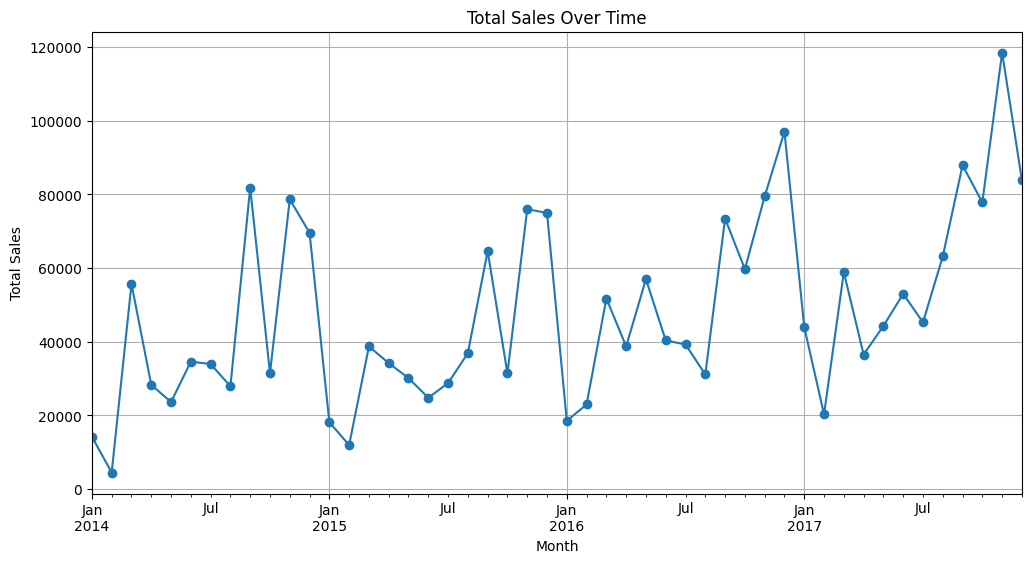

In [ ]:
## Total Sales Over Time

# We’ll aggregate sales data by month or year to identify overall trends.
# Aggregate sales by month
store['Order Month'] = store['Order Date'].dt.to_period('M')
Monthly_sales = store.groupby('Order Month')['Sales'].sum()

# Plot sales trends

plt.figure(figsize=(12,6))
Monthly_sales.plot(kind='line',marker = 'o',title = 'Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

* Total sales is increaing over time.

* Sales increases usually on November and December in every year.

* Sales is very low on January and February.

* 2017 has the highest sales in years.


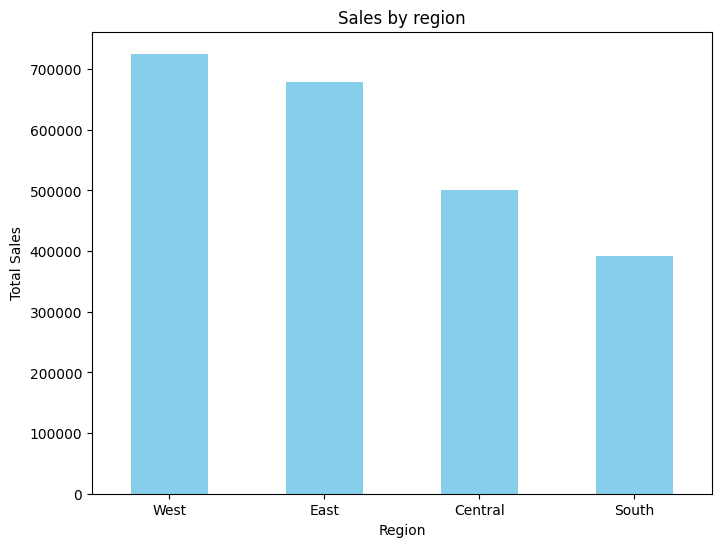

In [ ]:
# Sales by region

# Understand which regions contribute the most to sales.

region_sales = store.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot sales by region

region_sales.plot(kind='bar', figsize=(8,6), title='Sales by region',color = 'skyblue')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

* West region got the hishest sales.

* South region has the lowest sales.

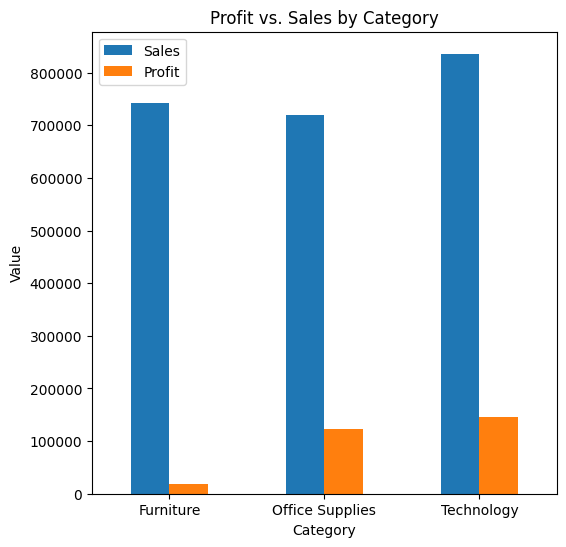

In [ ]:
# Profit vs. Sales by Category

# Identify which categories drive sales and profitability.

category_performance = store.groupby('Category')[['Sales','Profit']].sum()


# Plot sales and profit by category

category_performance.plot(kind='bar',title='Profit vs. Sales by Category',figsize=(6,6))
plt.xticks(rotation=0)
plt.ylabel('Value')
plt.xlabel('Category')
plt.show()

* In category Technology has the **highest Sales and Profit.**

* Furniture has **high sales but very less profit**.

* Office supplies has **very low sales but high profit.**

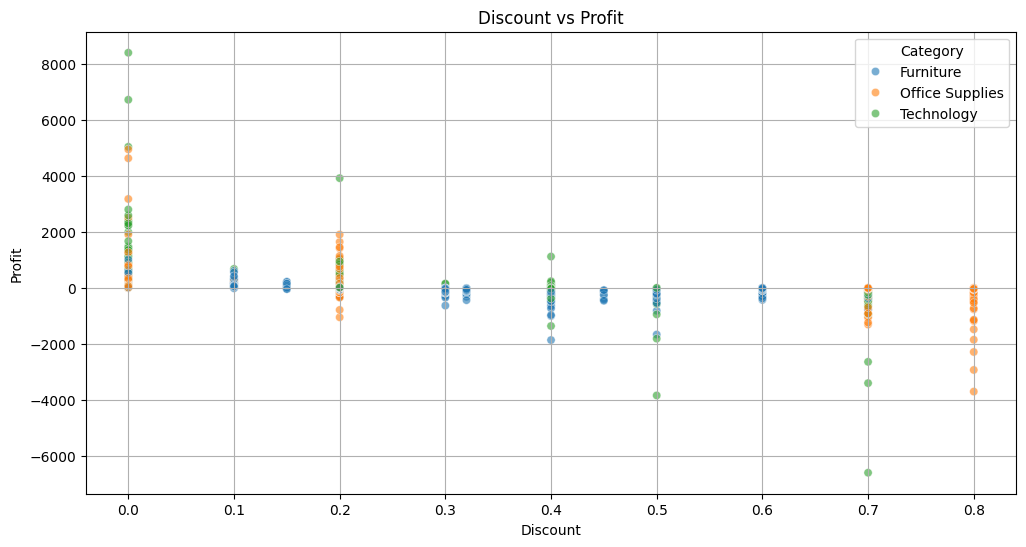

In [ ]:
# Discount Impact

# Analyze how discounts affect sales and profits.
# Scatterplot for Discount vs Profit

plt.figure(figsize=(12,6))
sns.scatterplot(data=store,x='Discount',y='Profit',hue='Category',alpha=0.6)
plt.title('Discount vs Profit')
plt.grid(True)
plt.show()



* Office supplies are given more discount and got negative profit.

* As discount increases profit is decreasing.

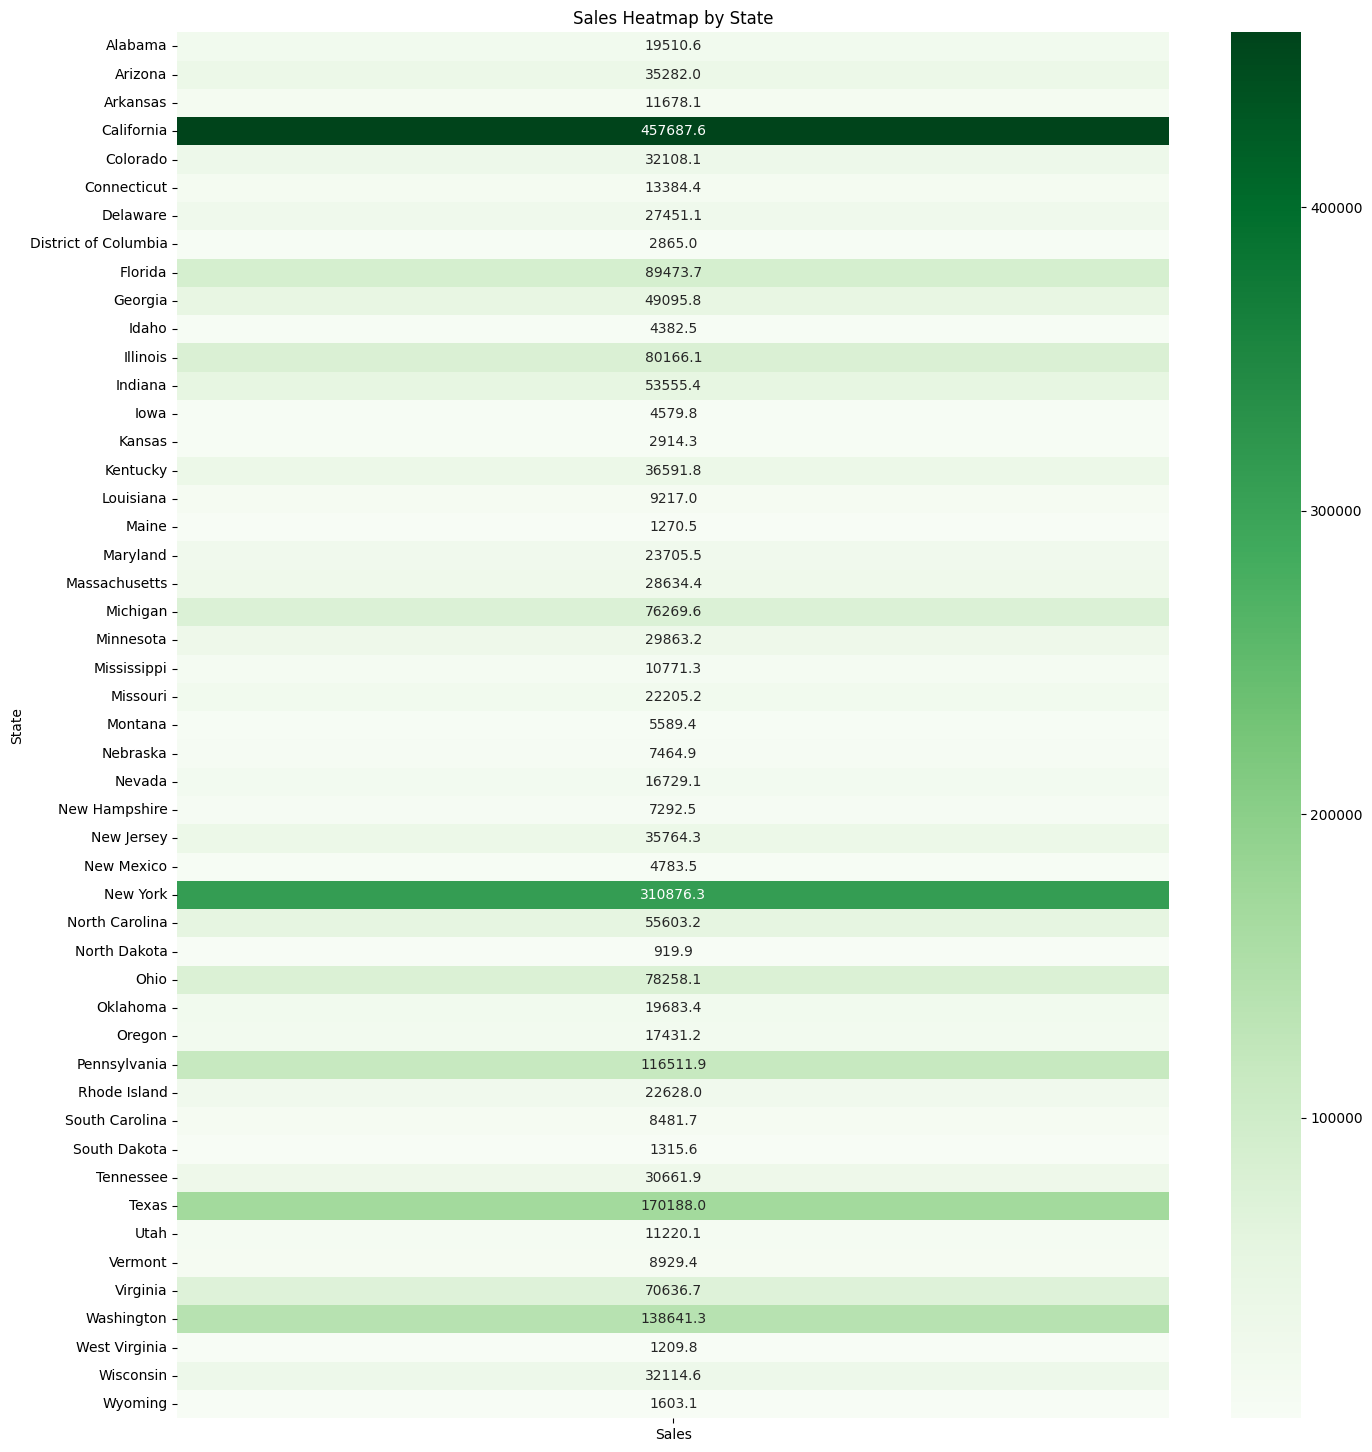

In [ ]:
# State-Wise Heatmap

# Visualize sales by state using a heatmap.
state_sales = store.groupby('State')['Sales'].sum()
pivot = store.pivot_table(index='State', values='Sales', aggfunc='sum')

# create Heatmap

plt.figure(figsize=(16,18))
sns.heatmap(pivot,annot=True,fmt='.1f',cmap='Greens',cbar=True)
plt.title('Sales Heatmap by State')
plt.ylabel('State')
plt.show()


* **California and New York** has the highest sales out of states.

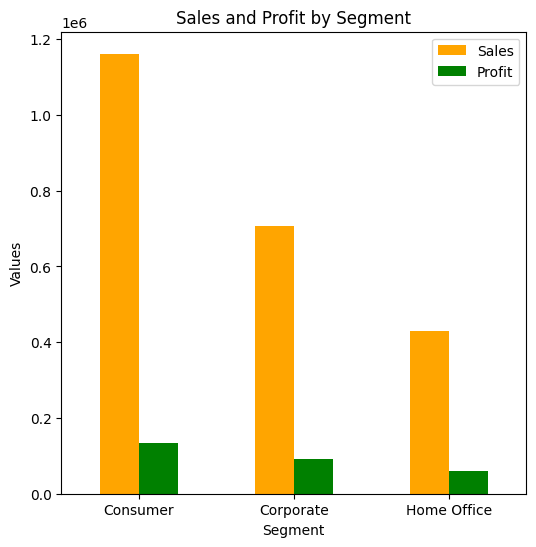

In [ ]:
# Customer Segments

# Analyze sales and profit by customer segments.

segment_performance = store.groupby('Segment')[['Sales','Profit']].sum()

# Plot sales and profit by segment
segment_performance.plot(kind='bar',figsize=(6,6),title='Sales and Profit by Segment',color = ['orange','green'])
plt.ylabel('Values')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.show()

* Consumer segment has **highest sales but low profit.**

* Home office has **very low sales and profit.**



**Insights to Look For:**

Overall Sales Trends: Is sales volume increasing or decreasing over time?

Top Regions and States: Which regions or states contribute the most to revenue?

Category Performance: Which product categories are most profitable?

Discount-Impact Relationship: Are heavy discounts reducing profits?

Segment Analysis: Which customer segments generate the highest revenue?

# **Insights**

1.   Sales volume is increasing over time.
2.   West region contributes more to revenue.
3.   California contributes more to revenue.
4.   Technology is more profitable.
5.   Heavy discounts are reducing profits.
6.   Consumer segment generates the highest revenue.





# **Actionable Insights & Recommendations**

Recommendation:

* For Growth: Continue focusing on successful marketing strategies or expand inventory in high-performing categories.

* For Decline: Investigate external factors such as competition or customer preferences. Consider running targeted marketing campaigns or offering seasonal promotions.

* For High-Performing Regions: Increase stock, optimize distribution channels, and allocate more marketing resources.

* For Underperforming Regions: Investigate factors such as regional preferences, local competitors, or ineffective marketing. Consider running region-specific campaigns or promotions to boost sales.

* For High Sales and Low Profit Categories: Review pricing strategies. You might need to adjust discounts or explore bundling options to increase margins.

* For Low Sales and High Profit Categories: Consider increasing marketing efforts or expanding availability. These categories may have untapped potential.

* Optimize Discount Strategy: Test different discount ranges to find a balance between attracting customers and maintaining profitability. Consider loyalty programs, where customers earn discounts through repeat purchases rather than deep discounting.

* Focus on Value: Shift focus from discounts to showcasing product value (e.g., premium features, better quality) to maintain profit margins.

* For High-Performing Segments: Tailor marketing efforts to these segments, ensuring continued engagement. Consider creating loyalty programs to increase repeat purchases.

* For Low-Performing Segments: Investigate why certain segments are underperforming (e.g., pricing, product fit). Consider creating custom offers or promotions targeted at these segments.


* For High-Sales States: Expand operations, stock, or marketing efforts in these regions to capitalize on high demand. Consider establishing local distribution centers or enhancing customer support.

* For Low-Sales States: Conduct surveys or focus groups to understand customer preferences. Focus on region-specific campaigns, and consider optimizing logistics to improve delivery times.


**Actionable Recommendations Summary**

1) Improve Profitability: Reevaluate discount strategies and focus on high-profit categories.

2) Targeted Marketing: Use regional, segment-based marketing to prioritize resources and increase ROI.

3) Expand Successful Areas: Focus on expanding inventory and marketing efforts in high-performing regions or categories.

4) Customer Retention: Develop loyalty programs or personalized offers for high-performing segments and increase efforts in underperforming segments.

**Final Action Plan:**

1) Market Expansion: Increase focus on regions and states with high sales, while investigating opportunities in lower-performing regions.

2) Profit Optimization: Adjust pricing, discounting, and product bundling strategies to improve profit margins.

3) Customer-Centric Strategies: Develop targeted campaigns for high-value segments and re-engage underperforming ones.
